In [10]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 31.2 MB 20.5 MB/s eta 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     |████████████████████████████████| 41.6 MB 15.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=5468938efcfccd5a103e750b1e99e16922726dcecbee80067f8bf399a95d42f8
  Stored in directory: /home/clinux01/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [43]:
df = pd.read_csv("pobreza_0.01_q2021-11-15.csv")
df

,index,RADIO_REF_ID,URP,DPTO,HOGAR_REF_ID,H15,H16,PERSONA_REF_ID,P02,P03,...,Pobreza,Indigencia,Pobreza_5usd,gap_pobreza,gap_indigencia,IDFRAC,PROV,NOMPROV,AGLOMERADO,Region
0,0,11277,1,6756,3642151,2,3,11401427,1,35,...,True,False,False,-3304.561953,2349.312912,15,6,Buenos Aires,33,gran_buenos_aires
1,1,11277,1,6756,3642151,2,3,11401428,2,32,...,True,False,False,-3304.561953,2349.312912,15,6,Buenos Aires,33,gran_buenos_aires
2,2,11277,1,6756,3642151,2,3,11401429,2,2,...,True,False,False,-3304.561953,2349.312912,15,6,Buenos Aires,33,gran_buenos_aires
3,3,11277,1,6756,3642236,2,3,11401698,1,75,...,False,False,False,1240.876094,12548.625824,15,6,Buenos Aires,33,gran_buenos_aires
4,4,11277,1,6756,3642236,2,3,11401699,2,68,...,False,False,False,1240.876094,12548.625824,15,6,Buenos Aires,33,gran_buenos_aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449234,449234,45584,1,78021,10518595,1,1,34379957,2,20,...,True,False,False,-7936.408441,1699.441551,12,78,Santa Cruz,20,patagonia
449235,449235,45584,1,78021,10518595,1,1,34379958,1,2,...,True,False,False,-7936.408441,1699.441551,12,78,Santa Cruz,20,patagonia
449236,449236,45556,1,78021,10510975,1,3,34355710,1,31,...,False,False,False,13156.443669,20383.331163,11,78,Santa Cruz,20,patagonia
449237,449237,45556,1,78021,10510975,1,3,34355711,2,24,...,False,False,False,13156.443669,20383.331163,11,78,Santa Cruz,20,patagonia


In [44]:
df.columns

Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
       'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
       'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS', 'PP07K', 'P47T_persona', 'ANO4', 'Q', 'P0910',
       'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
       'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
       'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
       'NOMPROV', 'AGLOMERADO', 'Region'],
      dtype='object')

In [45]:
df.dtypes.value_counts()

int64      26
float64     7
object      6
bool        3
dtype: int64

In [46]:
df.Pobreza.value_counts()

True     230394
False    218845
Name: Pobreza, dtype: int64

In [47]:
X = df[['P02','P03']] #Sexo y edad
Y = df[['Pobreza_5usd','Indigencia']] #pobreza e indigencia

In [48]:
Y.value_counts()

Pobreza_5usd  Indigencia
False         False         370486
True          True           44650
False         True           34103
dtype: int64

In [49]:
clf_model = DecisionTreeClassifier()
X_train, Y_train = X, Y['Indigencia']


clf_model.fit(X_train,Y_train)

y_predict= pd.Series(clf_model.predict(X))

In [50]:
resultado = pd.concat([Y['Pobreza_5usd'],y_predict], axis = 1)
resultado.columns = ['y_true','y_pred']

In [51]:
resultado

,y_true,y_pred
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
449234,False,False
449235,False,False
449236,False,False
449237,False,False


In [52]:
clf_model.score(X,Y['Pobreza_5usd'])

0.9006096977332778

In [53]:
from sklearn.neighbors import KNeighborsClassifier


In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)

0.8158663873795463

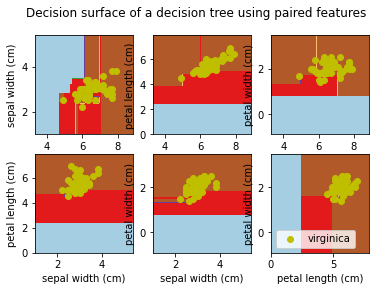

In [57]:
#Ignorar esto (por ahora)
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
[1, 2], [1, 3], [2, 3]]):
# We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
# Train
    clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    
                         
    np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
# Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)
    plt.axis("tight")
    
    
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()